# Task A: Data Loading and Feature Engineering
- Load Data: Load the downloaded CSV file into a Pandas DataFrame named `df`.

- Crucial Step: Specify the correct separator for this file, which is the semicolon (;).


 Create quality_group: Add a new categorical column named `quality_group` to `df` based on the integer
quality score:
- 'Low': quality <= 5
- 'Medium': quality = 6
- 'High': quality >= 7
- Filter Data: Create a new DataFrame, `df_high_quality`, which contains only the wines belonging to the
'High' `quality_group`.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 



In [2]:
df = pd.read_csv('winequality-red.csv', sep=";")
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:

conditions = [
    df['quality'] <= 5,   # Low quality
    df['quality'] == 6,   # Medium quality
    df['quality'] >= 7    # High quality
]
choices = [
    'Low', 
    'Medium', 
    'High'
]
df['quality_group'] = np.select(conditions, choices, default='Unknown')


print(df['quality_group'].value_counts())

quality_group
Low       744
Medium    638
High      217
Name: count, dtype: int64


In [4]:
conditions = [ 
    df['quality'] >= 7       
    ]

choices = [ 
          'high' 
    ]
df['quality_group'] = np.select(conditions, choices, default='Unknown')


print(df['quality_group'].value_counts())

quality_group
Unknown    1382
high        217
Name: count, dtype: int64


In [5]:
df_high_quality = df[df['quality_group'] == 'high']

print(df_high_quality)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
7               7.3              0.65         0.00             1.2      0.065   
8               7.8              0.58         0.02             2.0      0.073   
16              8.5              0.28         0.56             1.8      0.092   
37              8.1              0.38         0.28             2.1      0.066   
62              7.5              0.52         0.16             1.9      0.085   
...             ...               ...          ...             ...        ...   
1541            7.4              0.25         0.29             2.2      0.054   
1544            8.4              0.37         0.43             2.3      0.063   
1549            7.4              0.36         0.30             1.8      0.074   
1555            7.0              0.56         0.17             1.7      0.065   
1584            6.7              0.32         0.44             2.4      0.061   

      free sulfur dioxide  

Task B: Advanced Multi-Plot Visualization

Using the Matplotlib object-oriented interface `(fig, (ax1, ax2) = plt.subplots(...))`, create a single figure with
one row and two columns (1x2 layout) to display the following two visualizations:

1. Feature Correlation Heatmap (ax1 - Left Subplot)

- Calculate the correlation matrix for all numeric columns in the original `df` DataFrame.

- Plot this matrix using `seaborn.heatmap()` on `ax1`.

- Include the correlation values directly on the plot using `annot=True`.

- Choose a color map (e.g., 'coolwarm').

- Set the title: 'Feature Correlation Matrix'.

2. Alcohol Distribution by Quality Group (ax2 - Right Subplot)

- Based on your heatmap from Task 1, you should observe that the alcohol content has one of the
strongest positive correlations with the final quality score.

- Create a `seaborn.boxplot()` on `ax2` to compare the distribution of the alcohol content across the three
categories in the `quality_group` column of the original `df`.

- X-axis: `quality_group`

- Y-axis: `alcohol`
- Annotation: Use `ax2.axhline()` or `ax2.annotate()` to clearly mark the average alcohol content for the
'High' quality group (calculate this mean using Pandas first).

- Set the title: 'Alcohol Percentage Distribution by Quality Group'.

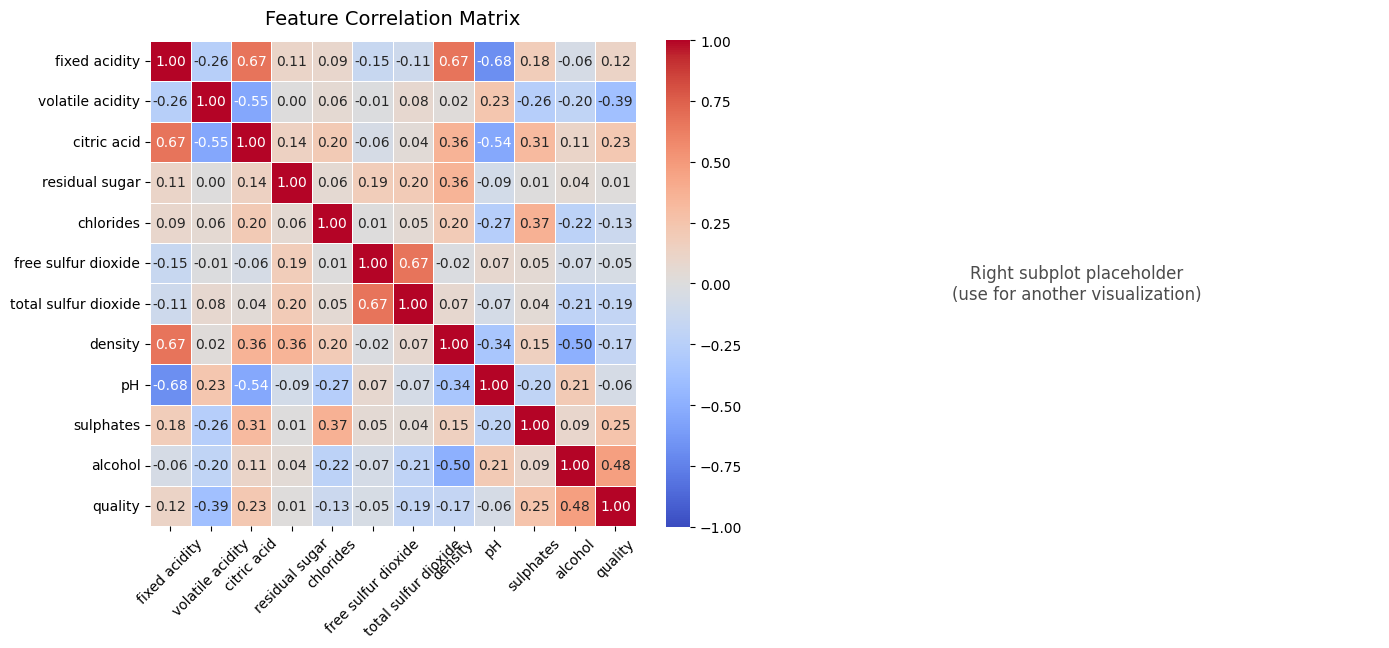

In [9]:
# --- Code assumes `df` (a pandas DataFrame) already exists in your environment ---

# 1) Create the figure with a 1x2 layout using the OO interface
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # wide figure to fit two subplots

# 2) Select numeric columns and compute correlation matrix
numeric_df = df.select_dtypes(include=[np.number])   # keep only numeric columns
corr = numeric_df.corr()                             # correlation matrix (pearson by default)

# Optional: if you prefer showing only lower triangle (less redundant), make a mask
# mask = np.triu(np.ones_like(corr, dtype=bool))    # uncomment to use an upper-triangle mask

# 3) Plot correlation heatmap on ax1 with annotation and chosen colormap
sns.heatmap(
    corr,
    ax=ax1,
    annot=True,            # show correlation numbers in the cells
    fmt=".2f",             # number format with 2 decimal places
    cmap="coolwarm",       # color map as requested
    vmin=-1, vmax=1,       # fix color scale to [-1, 1] for consistent interpretation
    linewidths=0.5,        # lines between cells
    linecolor="white",
    square=True,           # square cells
    # mask=mask            # uncomment if you created the mask and want only lower triangle
)

# 4) Format the left subplot (ax1)
ax1.set_title("Feature Correlation Matrix", fontsize=14, pad=12)
ax1.tick_params(axis='x', rotation=45)  # rotate x labels for readability
ax1.tick_params(axis='y', rotation=0)

# 5) Prepare right subplot (ax2) as a placeholder (so layout looks balanced)
ax2.axis("off")  # turn off axis for placeholder
ax2.text(0.5, 0.5, "Right subplot placeholder\n(use for another visualization)",
         ha="center", va="center", fontsize=12, alpha=0.7)

# 6) Tight layout and show
plt.tight_layout()
plt.show()

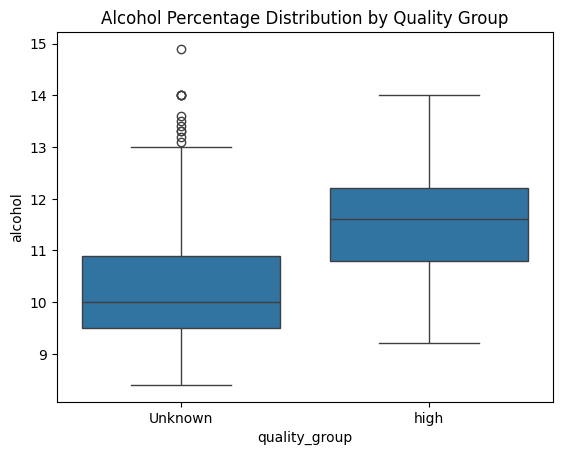

In [ ]:
plt.Figure(figsize=(14,6))
sns.boxplot(data=df, x = 'quality_group', y = 'alcohol')
plt.title("Alcohol Percentage Distribution by Quality Group")
plt.xlabel('quality_group')
plt.ylabel('alcohol')
plt.show()

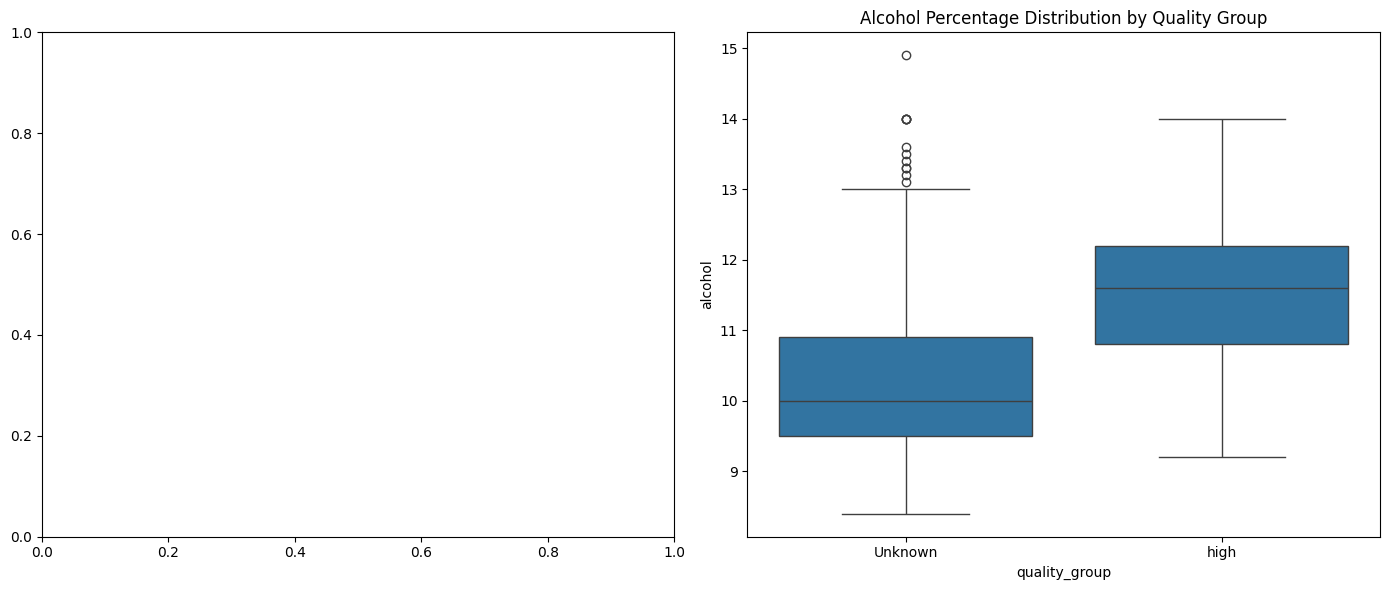

In [14]:
# Step 1: Create your figure with two subplots (1x2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# (Assume ax1 already contains your heatmap from Task 1)

# Step 2: Boxplot on ax2
sns.boxplot(data=df, x='quality_group', y='alcohol', ax=ax2)

# Step 3: Compute the mean alcohol for the 'High' group
high_mean = df[df['quality_group'] == 'High']['alcohol'].mean()

# Step 4: Add annotation or horizontal line to mark the high-quality mean
ax2.axhline(high_mean, color='red', linestyle='--', linewidth=1.5)
ax2.annotate(f"High-quality mean: {high_mean:.2f}",
             xy=('High', high_mean),
             xytext=('High', high_mean + 0.3),
             arrowprops=dict(arrowstyle='->', color='red'))

# Step 5: Titles & labels
ax2.set_title("Alcohol Percentage Distribution by Quality Group")
ax2.set_xlabel("quality_group")
ax2.set_ylabel("alcohol")

plt.tight_layout()
plt.show()
